In [ ]:
'''
    Device Failure Prediction 두 번째 내용입니다.
    이 프로젝트는 데이터 전처리와 Feature Engineering을 더해 가는 과정을 통해, 모델의 성능이 개선되는 
    것을 살펴보는 것이 목적입니다. 적용 대상 알고리즘은 Logistic Regression입니다.
    
    두 번째 내용에서는 Feature  Selection을 적용하여, 수치가 음 또는 양으로 높게 나오는 것을 골라서 모델에 적용하여
    결과를 보는 것을 목표로 합니다.
'''

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas 라이브러리를 import합니다.
import pandas as pd

In [38]:
# 데이터 셑을 로딩합니다.
df = pd.read_csv("/content/drive/MyDrive/device.txt")

In [12]:
# 데이터 로딩이 제대로 된 것인지 확인 합니다.
df.head(5)

# 데이터 로딩이 제대로 된 것 같습니다.

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [13]:
# 데이터 널 값 확인을 합니다.

df.isnull().sum()

# 결과를 보니 널 값은 없습니다.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [14]:
# 데이터 결측치를 확인 합니다.

df.isna().sum()

# 결과를 보니 결측치는 없습니다.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [15]:
# 각 변수가 가지는 unique 값들의 수를 살펴 봅니다.

df.nunique()

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [16]:
# 독립 변수들간의 상관 관계를 수치로 살펴봅니다.

df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


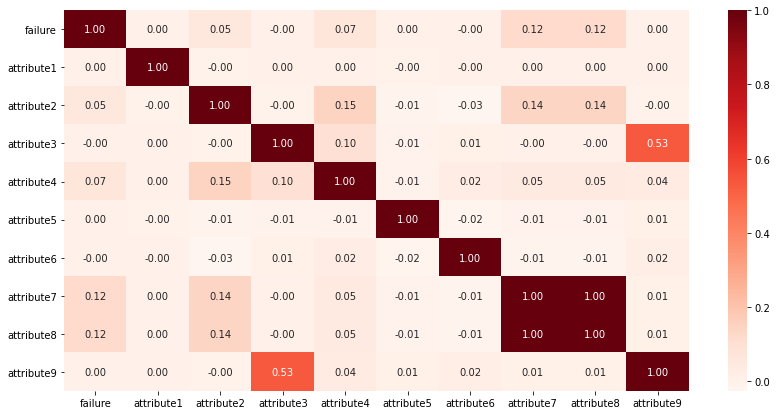

In [17]:
# 시각적으로 상관 관계를 살펴봅니다.
# 시각적으로 살펴보기 위해 seaborn과 pyplot을 import 합니다.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.heatmap(data = df.corr(), fmt ='.2f', annot=True, cmap='Reds')

In [18]:
# 데이터 셑에서 타겟 변수인 'failure' 컬럼을 데이터 셑 맨 뒤로 옮겨서 다시 살펴봅니다.
failure = df.failure
df.drop('failure', axis=1, inplace=True)
df = df.join(failure.astype(int))

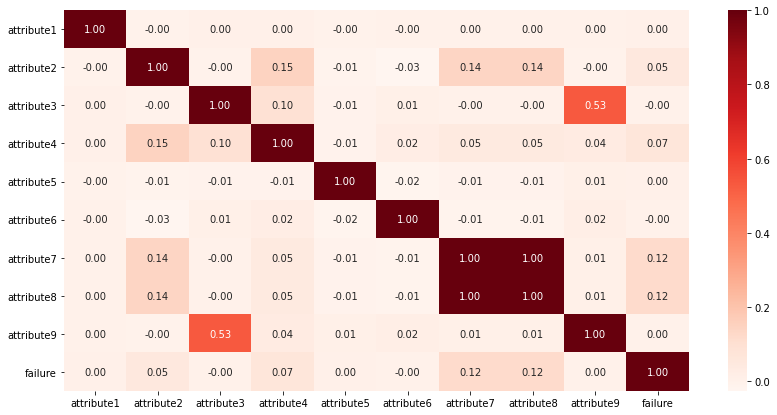

In [19]:
# 타겟 변수를 맨 마지막에 위치 시키면 데이터 셑을 살펴보기가 훨씬 수월해집니다.
# 다시 상관 관계를 살펴보도록 하겠습니다.

plt.figure(figsize=(14, 7))
sns.heatmap(data=df.corr(), fmt='.2f', annot=True, cmap='Reds')

# 아래의 상관관계 수치를 보면 'attribute7' 과 'attribute8'의 관계가 1 입니다. 뭔가 이 두 변수간의 관계를 살펴봐야 할 것 같습니다.
# 그리고 'attribute3'과 'attribute9'의 관계 또는 양의 관계로 다른 변수들과 달리 높은 수치를 보이고 있습니다.

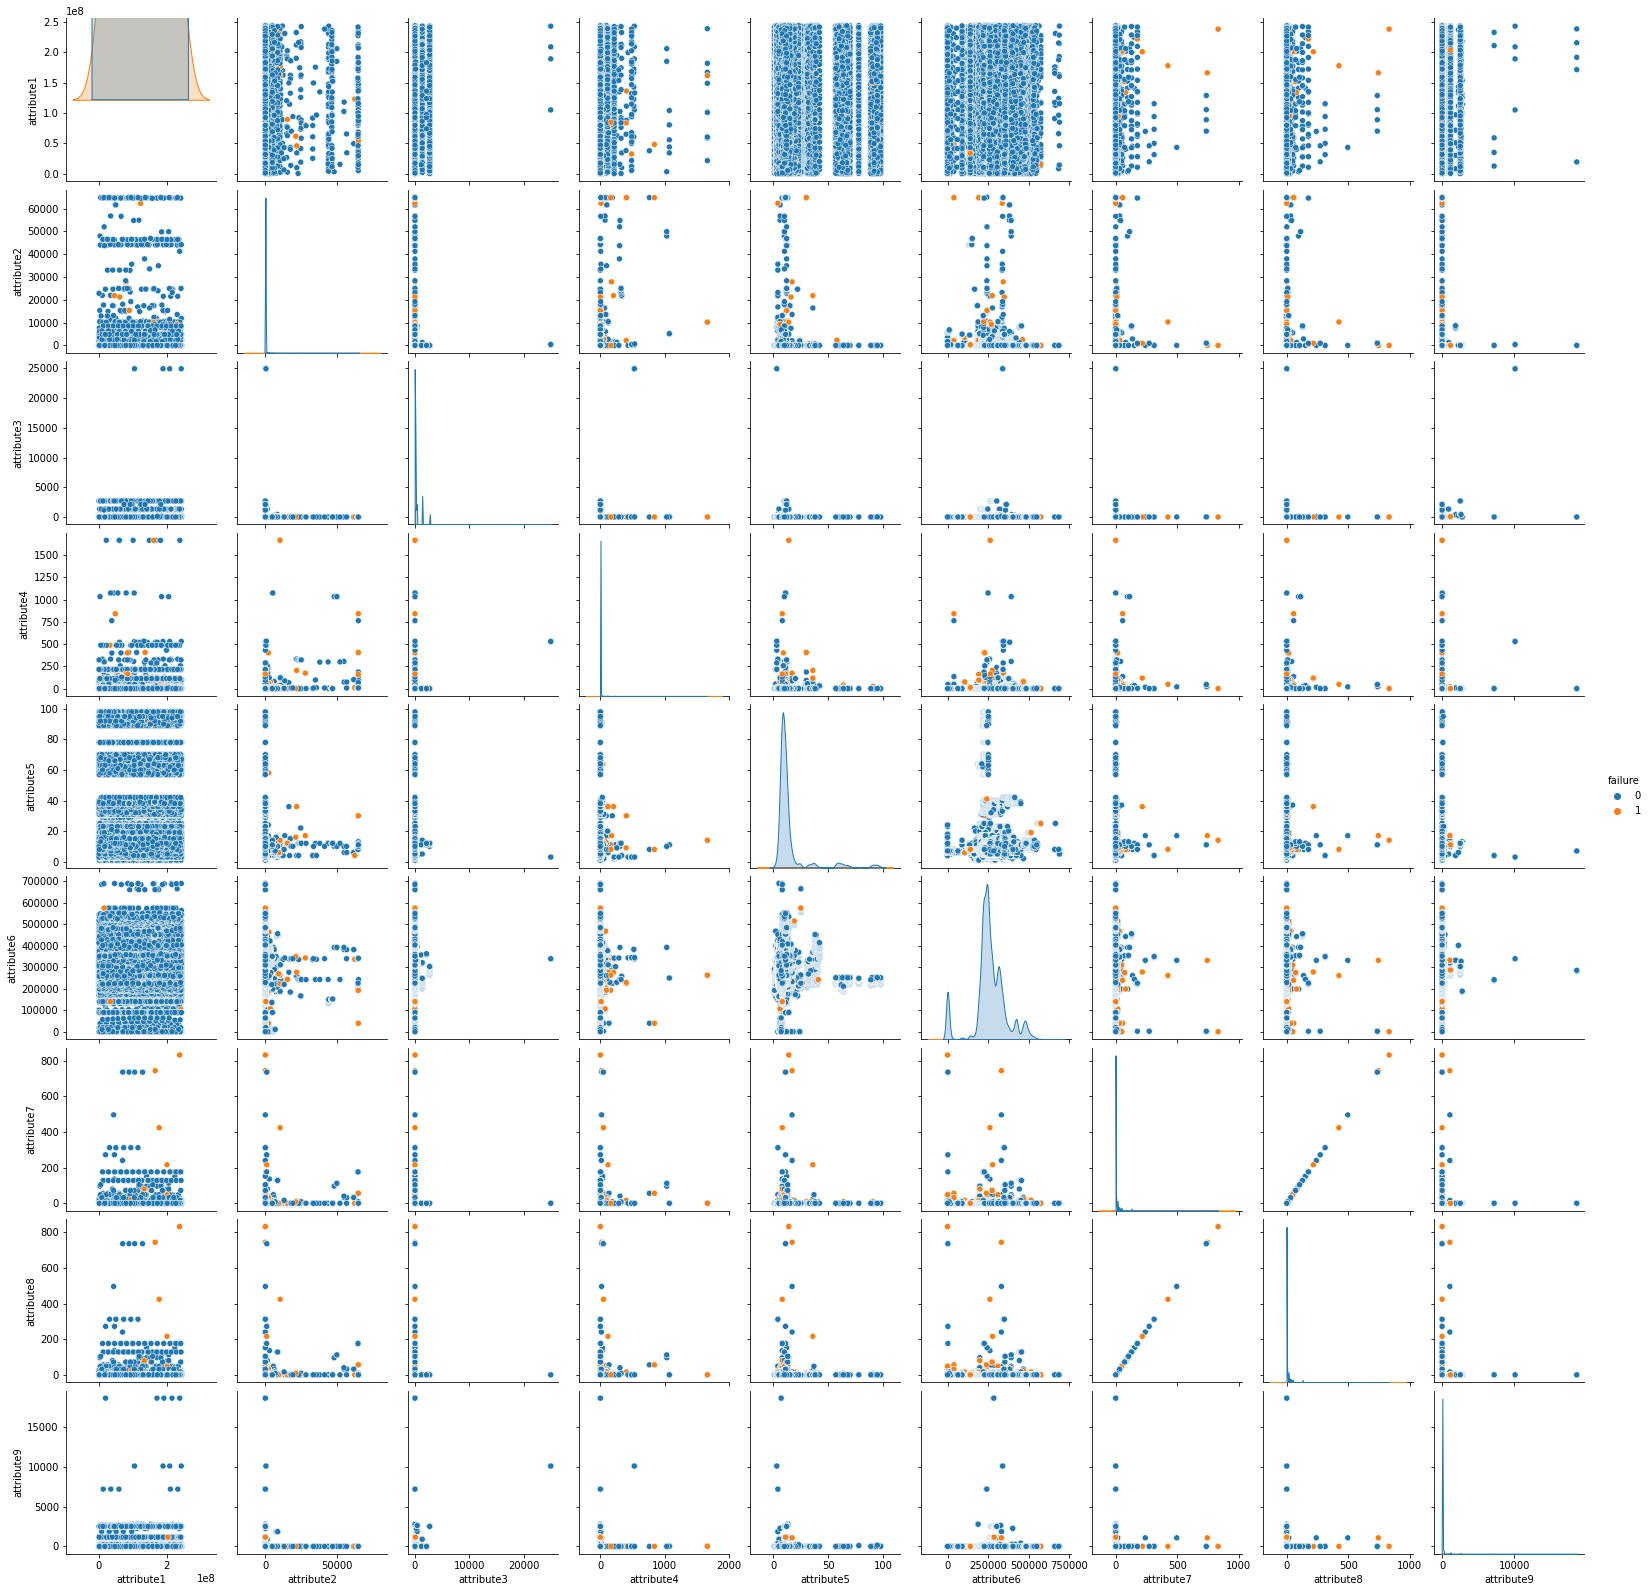

In [23]:
# 먼저 전체 변수의 상관관계를 pairplot을 이용해서 다시 한 번 살펴보도록 하겠습니다.
sns.pairplot(df, hue='failure')

In [31]:
# 위의 그래프를 보면, 'attribute7'과 'attribute8'이 완전한 선형 관계를 이루고 있다는 걸 볼 수 있습니다.
# 그럼 'attribute7'과 'attribute8'의 값들이 동일한지 확인해 보겠습니다.
import numpy as np

column_values_compare = pd.DataFrame(np.where(df['attribute7']==df['attribute8'], True, False))
column_values_compare.value_counts()

# 아래의 결과를 보면 두 컬럼은 모두 같은 값이라는 걸 확인 할 수 있습니다.

True    124494
dtype: int64

In [39]:
# 그럼 두 컬럼 중 'attribute8' 컬럼을 drop 하겠습니다.

df.drop('attribute8', axis=1, inplace=True)
df.info()

# 컬럼 'attribute8'을 성공적으로 drop 한 것을 확인 할 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


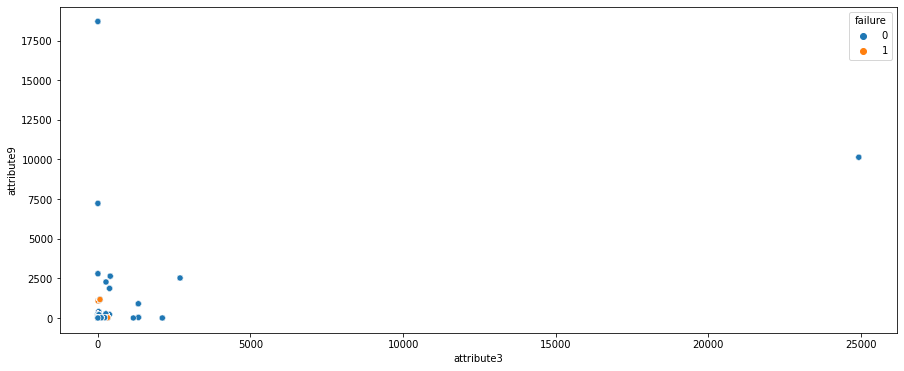

In [42]:
# 그럼 이번에는 'attribute3'과 'attribute9'의 관계를 scatter plot을 이용해서 살펴 보겠습니다.

plt.figure(figsize=(15,6))
sns.scatterplot(x='attribute3', y='attribute9', hue='failure', data=df)


Text(0.5, 1.0, 'attribute9 vs Failure')

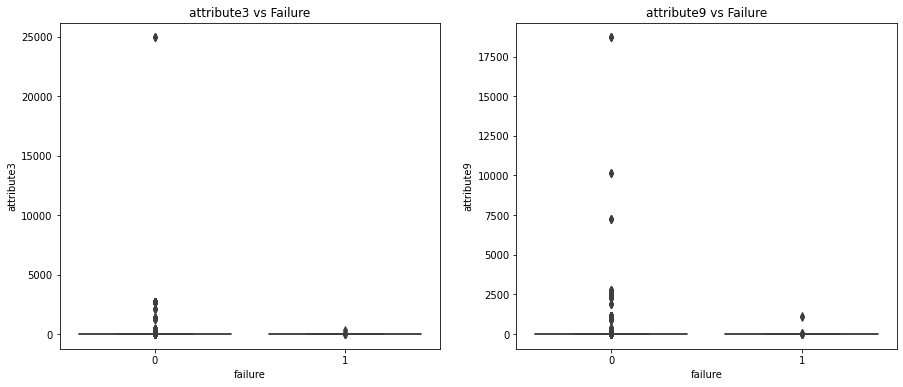

In [53]:
# Box Plot을 이용해서 한 번 값들의 분포를 살펴 보겠습니다.

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.boxplot(x='failure', y='attribute3', data=df, ax=axes[0])
axes[0].set_title('attribute3 vs Failure')

sns.boxplot(x='failure', y='attribute9', data=df, ax=axes[1])
axes[1].set_title('attribute9 vs Failure')

# 아래 Box Plot을 보면 두 변수의 값들의 범위와 분포가 상당히 유사하다는 걸 확인할 수 있습니다.
# 그리고 두 변수 모두 타겟 변수에 대한 식별을 하기에 유용한 변수라고는 할 수 없을 것 같습니다.
# 두 변수 중 하나는 drop을 한다고 해도 별 문제는 없을 것 같지만, 일단 데이터 셑에 유지하고, 다음에 Feature Selection에서 중요도 값을 확인해 보겠습니다.

In [116]:
# Feature Selection을 실행 합니다.
# 'date'와 'device'은 수치 변수로 변환하지 않았기 때문에 drop합니다.
df_copy = df.copy()
X = df_copy.drop('failure', axis=1)
Y = df_copy.failure
X = X.drop('date', axis=1)
X = X.drop('device', axis=1)

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute3  124494 non-null  int64
 3   attribute4  124494 non-null  int64
 4   attribute5  124494 non-null  int64
 5   attribute6  124494 non-null  int64
 6   attribute7  124494 non-null  int64
 7   attribute9  124494 non-null  int64
dtypes: int64(8)
memory usage: 7.6 MB


In [68]:
Y.shape

(124494,)

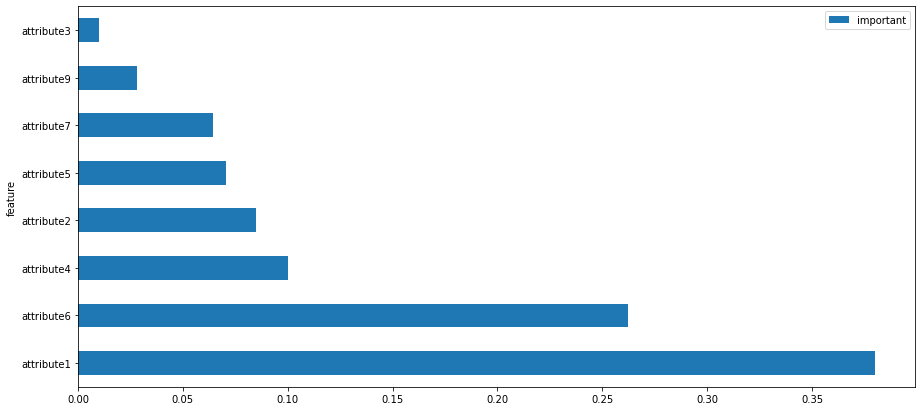

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X,Y)

features = pd.DataFrame()
features['feature']= X.columns
features['important']=clf.feature_importances_
features.sort_values(by=['important'], ascending=False,inplace=True)
features.set_index('feature', inplace=True)
features.iloc[:20,:].plot(kind='barh', figsize=(15,7))

In [ ]:
# 먼저 모든 변수를 입력 대상으로 한 모델을 생성해 보겠습니다.



In [118]:
# 모델 생성에 필요한 Scikit-Learn 라이브러리 import.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [119]:
# 모델 생성 함수 정의
# 모델 생성 함수 
def modeling(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    metrics(Y_test, pred)

In [145]:
# 모델 평가 함수 정의
def metrics(Y_test, pred):
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred, labels=np.unique(pred))
    recall = recall_score(Y_test, pred) 
    #f1 = f1_score(Y_test, pred)
    f1 = f1_score(Y_test, pred, labels=np.unique(pred))
    roc_score = roc_auc_score(Y_test, pred, average='macro')
    print ('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2: .4f}'.format(accuracy, precision, recall))
    print ('f1-score: {0:.4f}, auc: {1:.4f}'.format(f1, roc_score))

In [121]:
from sklearn.model_selection import train_test_split

# tested on RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [122]:

# 모델을 새로 추가된 컬럼들을 이용해서 다시 측정해 봄.
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# 이번에는 중요도 값이 낮은 'attribute3'과 'attribute9'을 drop하고 다시 모델을 생성해 봅니다.

X = X.drop('attribute3', axis=1)
X = X.drop('attribute9', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute4  124494 non-null  int64
 3   attribute5  124494 non-null  int64
 4   attribute6  124494 non-null  int64
 5   attribute7  124494 non-null  int64
dtypes: int64(6)
memory usage: 5.7 MB


In [124]:
# tested on RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [125]:
# 모델을 새로 추가된 컬럼들을 이용해서 다시 측정해 봄.
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# 별다른 변화가 없습니다.
# 그럼 이번에는 'attribute2', 'attribute5', 'attribute7'을 drop한 상태에서 모델을 생성해 보겠습니다.
# tested on RandomForestClassifier

X = X.drop('attribute2', axis=1)
X = X.drop('attribute5', axis=1)
X = X.drop('attribute7', axis=1)
X.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute4  124494 non-null  int64
 2   attribute6  124494 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB
정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# 이번에도 별 다른 변화는 없습니다.
# 그럼 'attribute4'도 drop한 상태에서 다시 모델을 생성해 보겠습니다.
X = X.drop('attribute4', axis=1)
X.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute6  124494 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB
정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 이번에는 모든 변수의 Box Plot을 그려서 다시 한 번 변수들을 살펴보고, 타겟 변수들에 대해 영향이 있을 만한 변수들을 임의로 선택해서 모델을
# 생성해 보겠습니다.

In [128]:

# Create Box Plots.
# Box Plot을 그릴 수가 정해져 있기 때문에 하드 코딩으로 진행 합니다.
def box_plots(df):
    f, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
    columns = [x for x in df.columns if x != 'failure' and x != 'date' and x != 'device']
    col = 0
    for r in range(2):
        for i in range(4):
            sns.boxplot(x=df.failure, y=columns[col], data=df, ax=axes[r][i])
            axes[r][i].set_title(columns[col] + ' vs Failure')
            col += 1

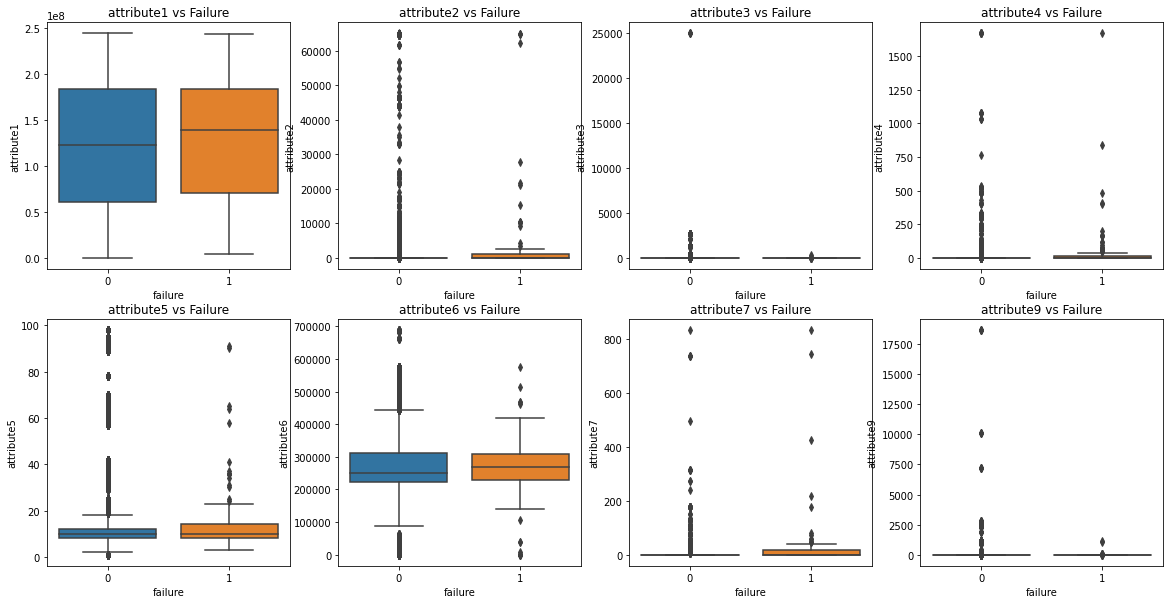

In [129]:
# Box Plot을 이용해서 확인 함.
box_plots(df)

In [156]:
X = df.copy()
X = X.drop(['date', 'device', 'failure', 'attribute1', 'attribute3', 'attribute4', 'attribute6', 'attribute9'], axis=1)
Y = df.failure

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute2  124494 non-null  int64
 1   attribute5  124494 non-null  int64
 2   attribute7  124494 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
# Feature Importance 에서 중요하다고 판단된 변수를 사용해서 모델을 해 보았고
# 박스 플랏을 보고 임의로 변수를 선택해서 모델을 생성해 봤지만, 모델의 성능에는 영향을 주지 않았습니다.
# 다른 변수들을 선택해서 다시 모델을 생성할 수도 있지만, 별다른 개선은 없을 것 같아, 다른 변수들을 선택하여 모델 생성하는 것은 이정도로 마치고,
# Part3에서는 아웃라이어를 선택하여 제거한 후, 모델을 생성하는 것을 진행해 보겠습니다.